In [424]:
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Leer archivos CSV
train = pd.read_csv('D:\\Ale\\Competitions\\Titanic\\Data\\train.csv')
test = pd.read_csv('D:\\Ale\\Competitions\\Titanic\\Data\\test.csv')

# Mostrar las columnas y las primeras 3 filas del archivo train
print("Train Data:")
print(tabulate(train.head(3), headers='keys', tablefmt='psql'))

# Mostrar las columnas y las primeras 3 filas del archivo test
print("\nTest Data:")
print(tabulate(test.head(3), headers='keys', tablefmt='psql'))

Train Data:
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Cabin   | Embarked   |
|----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------|
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | nan     | S          |
|  1 |             2 |          1 |        1 | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female |    38 |       1 |       0 | PC 17599         | 71.2833 | C85     | C          |
|  2 |             3 |          1 |   

In [425]:
# Contar valores nulos y obtener tipos de datos en train
nulos_train = train.isnull().sum()
tipos_train = train.dtypes

# Contar valores nulos y obtener tipos de datos en test
nulos_test = test.isnull().sum()
tipos_test = test.dtypes

# Combinar valores nulos y tipos de datos en train
train_info = pd.DataFrame({'Valores nulos': nulos_train, 'Tipo de dato': tipos_train})

# Combinar valores nulos y tipos de datos en test
test_info = pd.DataFrame({'Valores nulos': nulos_test, 'Tipo de dato': tipos_test})

# Mostrar los datos de valores nulos y tipos en train
print("Información del archivo Train:")
print(tabulate(train_info.reset_index(), headers=['Columna', 'Valores nulos', 'Tipo de dato'], tablefmt='psql'))

# Mostrar los datos de valores nulos y tipos en test
print("\nInformación del archivo Test:")
print(tabulate(test_info.reset_index(), headers=['Columna', 'Valores nulos', 'Tipo de dato'], tablefmt='psql'))

Información del archivo Train:
+----+-------------+-----------------+----------------+
|    | Columna     |   Valores nulos | Tipo de dato   |
|----+-------------+-----------------+----------------|
|  0 | PassengerId |               0 | int64          |
|  1 | Survived    |               0 | int64          |
|  2 | Pclass      |               0 | int64          |
|  3 | Name        |               0 | object         |
|  4 | Sex         |               0 | object         |
|  5 | Age         |             177 | float64        |
|  6 | SibSp       |               0 | int64          |
|  7 | Parch       |               0 | int64          |
|  8 | Ticket      |               0 | object         |
|  9 | Fare        |               0 | float64        |
| 10 | Cabin       |             687 | object         |
| 11 | Embarked    |               2 | object         |
+----+-------------+-----------------+----------------+

Información del archivo Test:
+----+-------------+-----------------+----

In [426]:
# Identificar las columnas categóricas
categorical_columns = ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch', 'Cabin']

# Función para mostrar las variaciones de clases categóricas
def show_categorical_variations(df, categorical_cols):
    for col in categorical_cols:
        print(f"Distribución de '{col}' en el dataset:")
        print(df[col].value_counts())
        print('-' * 50)

# Mostrar las variaciones de las clases categóricas en el dataset de entrenamiento
print("Variaciones en el dataset de entrenamiento:")
show_categorical_variations(train, categorical_columns)

Variaciones en el dataset de entrenamiento:
Distribución de 'Sex' en el dataset:
Sex
male      577
female    314
Name: count, dtype: int64
--------------------------------------------------
Distribución de 'Pclass' en el dataset:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
--------------------------------------------------
Distribución de 'Embarked' en el dataset:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
--------------------------------------------------
Distribución de 'SibSp' en el dataset:
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
--------------------------------------------------
Distribución de 'Parch' en el dataset:
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
--------------------------------------------------
Distribución de 'Cabin' en el dataset:
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
    

In [427]:
# Contar el número de sobrevivientes y no sobrevivientes
survival_counts = train['Survived'].value_counts()
print("Contador de Sobrevivientes y No Sobrevivientes:")
print(survival_counts)

# Mostrar el porcentaje de cada clase
survival_percentage = train['Survived'].value_counts(normalize=True) * 100
print("\nPorcentaje de Sobrevivientes y No Sobrevivientes:")
print(survival_percentage)

# Verificar las variantes de cada uno de los atributos relevantes
attributes_to_check = ['Sex', 'Age', 'Fare', 'Embarked', 'Pclass']

for attribute in attributes_to_check:
    print(f"\nVariantes de '{attribute}' por Sobrevivientes:")
    print(train.groupby('Survived')[attribute].value_counts())

Contador de Sobrevivientes y No Sobrevivientes:
Survived
0    549
1    342
Name: count, dtype: int64

Porcentaje de Sobrevivientes y No Sobrevivientes:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

Variantes de 'Sex' por Sobrevivientes:
Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

Variantes de 'Age' por Sobrevivientes:
Survived  Age 
0         21.0    19
          28.0    18
          18.0    17
          25.0    17
          19.0    16
                  ..
1         43.0     1
          47.0     1
          53.0     1
          55.0     1
          80.0     1
Name: count, Length: 142, dtype: int64

Variantes de 'Fare' por Sobrevivientes:
Survived  Fare    
0         8.0500      38
          7.8958      37
          13.0000     26
          7.7500      22
          26.0000     16
                      ..
1         82.1708      1
          83.4750      1
          10

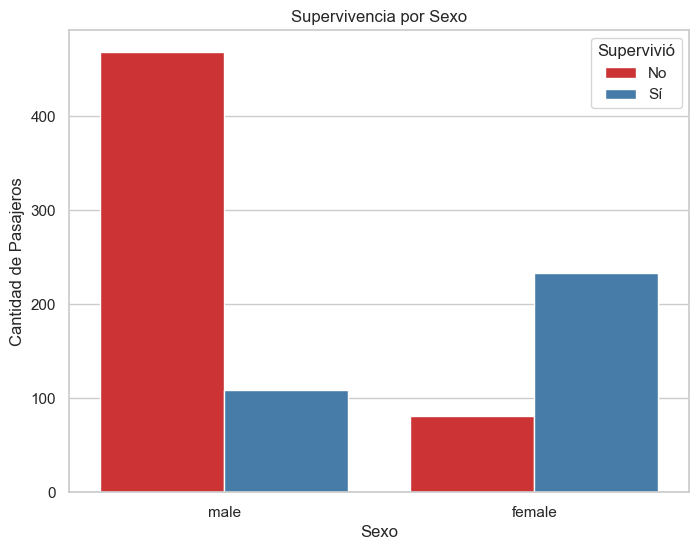

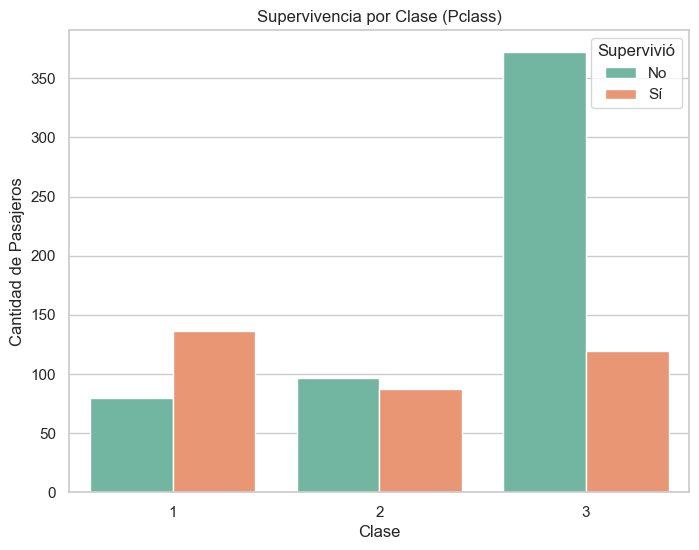

C:\Users\Gubier\AppData\Local\Temp\ipykernel_6284\2227083892.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = train.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)


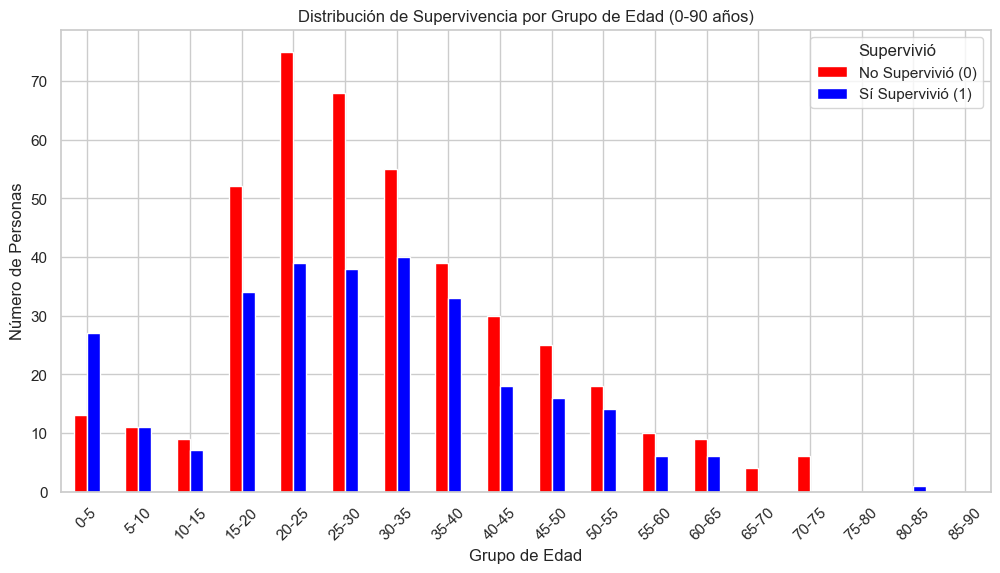

C:\Users\Gubier\AppData\Local\Temp\ipykernel_6284\2227083892.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_group_means = train.groupby(fare_bins)['Survived'].mean()
C:\Users\Gubier\AppData\Local\Temp\ipykernel_6284\2227083892.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fare_group_means.index.astype(str), y=fare_group_means.values, palette='coolwarm')


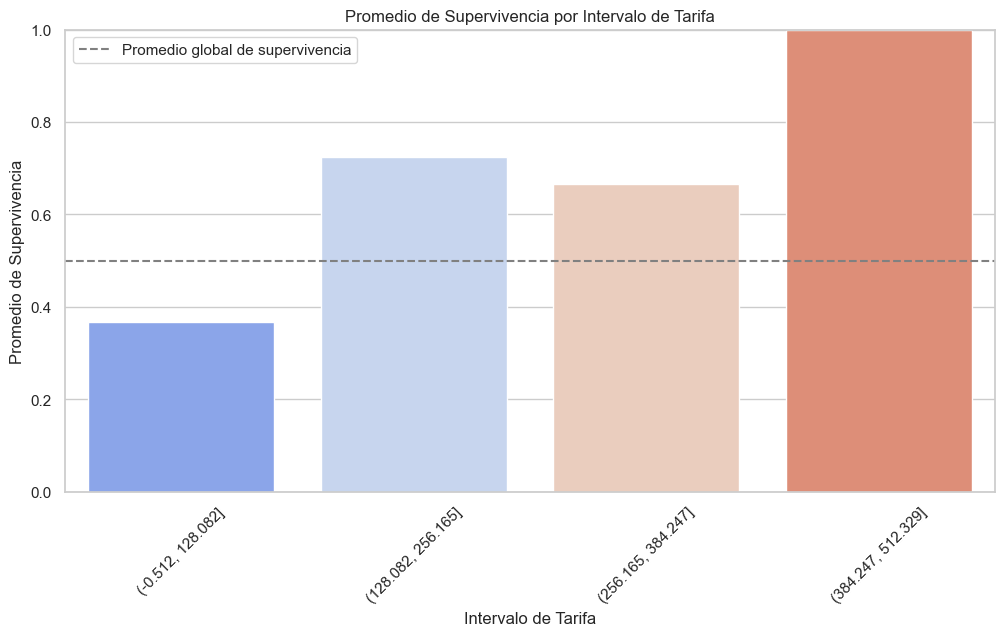

<Figure size 1000x600 with 0 Axes>

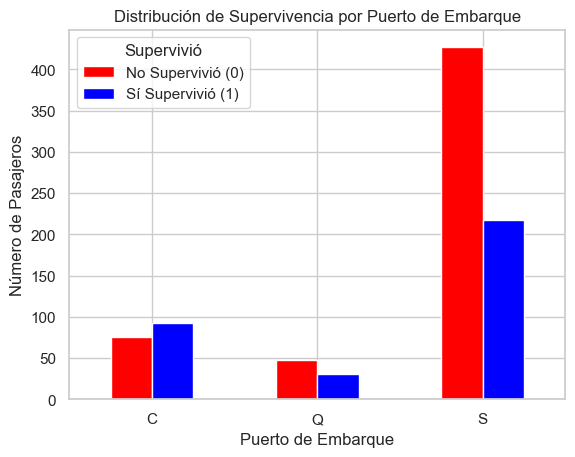

<Figure size 1000x600 with 0 Axes>

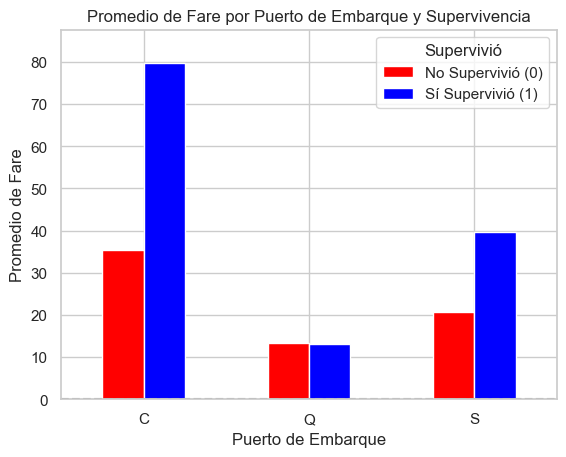

<Figure size 1200x800 with 0 Axes>

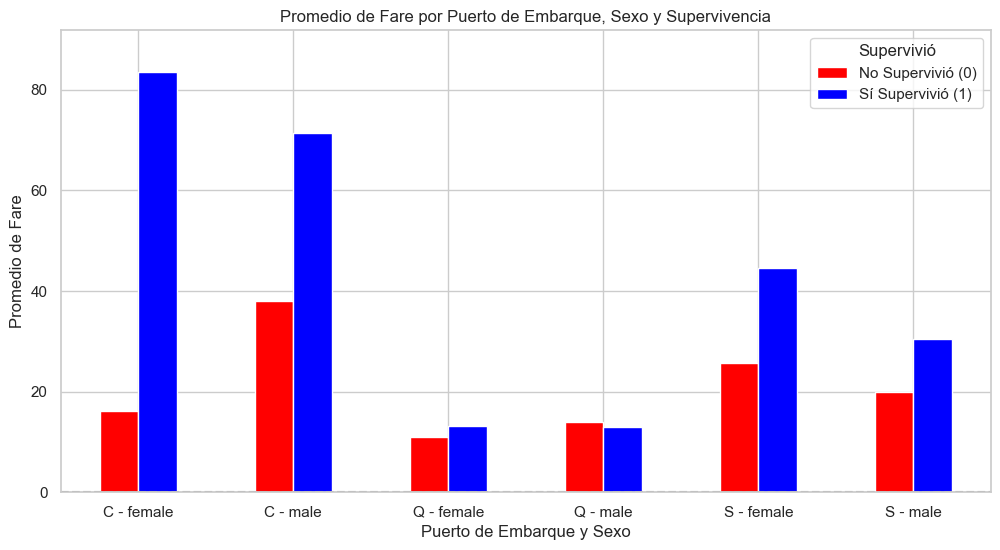

In [428]:
# Configurar estilo de Seaborn
sns.set(style='whitegrid')

# 1. Gráfico de barras para la relación entre Sex y Survived
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Sex', hue='Survived', palette='Set1')
plt.title('Supervivencia por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Supervivió', loc='upper right', labels=['No', 'Sí'])
plt.show()

# 2. Gráfico de barras para la relación entre Pclass y Survived
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Pclass', hue='Survived', palette='Set2')
plt.title('Supervivencia por Clase (Pclass)')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Supervivió', loc='upper right', labels=['No', 'Sí'])
plt.show()
###########################################################
# Crear intervalos de edad de 5 en 5
bins = list(range(0, 95, 5))  # Rango de 0 a 90 en intervalos de 5
labels = [f'{i}-{i+5}' for i in bins[:-1]]  # Crear etiquetas como '0-5', '5-10', etc.
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)

# Calcular la cantidad de personas en cada grupo de edad para cada categoría de Survived
age_group_counts = train.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)

# Crear un gráfico de barras para visualizar la cantidad de sobrevivientes y no sobrevivientes
age_group_counts.plot(kind='bar', stacked=False, color=['red', 'blue'], figsize=(12, 6))
plt.title('Distribución de Supervivencia por Grupo de Edad (0-90 años)')
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Personas')
plt.xticks(rotation=45)
plt.legend(['No Supervivió (0)', 'Sí Supervivió (1)'], title='Supervivió')
plt.show()
###############################################################
# Definir el número de intervalos
num_bins = 4

# Crear intervalos de tarifa
fare_bins = pd.cut(train['Fare'], bins=num_bins)

# Calcular la media de Survived para cada intervalo de Fare
fare_group_means = train.groupby(fare_bins)['Survived'].mean()

# Graficar los resultados
plt.figure(figsize=(12, 6))
sns.barplot(x=fare_group_means.index.astype(str), y=fare_group_means.values, palette='coolwarm')
plt.title('Promedio de Supervivencia por Intervalo de Tarifa')
plt.xlabel('Intervalo de Tarifa')
plt.ylabel('Promedio de Supervivencia')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Establecer el rango de Y entre 0 y 1 para mejor visualización
plt.axhline(y=0.5, color='gray', linestyle='--', label='Promedio global de supervivencia')
plt.legend()
plt.show()

#######################

# Contar la cantidad de pasajeros en cada puerto de embarque para cada categoría de supervivencia
embarked_counts = train.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
embarked_counts.plot(kind='bar', stacked=False, color=['red', 'blue'])
plt.title('Distribución de Supervivencia por Puerto de Embarque')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Número de Pasajeros')
plt.xticks(rotation=0)  # Mantener las etiquetas del eje X horizontal
plt.legend(['No Supervivió (0)', 'Sí Supervivió (1)'], title='Supervivió')
plt.show()

##########################

# Calcular el promedio de Fare para cada combinación de Embarked y Survived
fare_embarked_means = train.groupby(['Embarked', 'Survived'])['Fare'].mean().unstack()

# Graficar los resultados
plt.figure(figsize=(10, 6))
fare_embarked_means.plot(kind='bar', color=['red', 'blue'])
plt.title('Promedio de Fare por Puerto de Embarque y Supervivencia')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Promedio de Fare')
plt.xticks(rotation=0)  # Mantener las etiquetas del eje X horizontal
plt.legend(['No Supervivió (0)', 'Sí Supervivió (1)'], title='Supervivió')
plt.ylim(0, fare_embarked_means.max().max() * 1.1)  # Ajustar el límite del eje Y
plt.axhline(y=0, color='gray', linestyle='--', label='Promedio global de Fare')
plt.show()

##############################

# Calcular el promedio de Fare para cada combinación de Embarked, Sex y Survived
fare_embarked_sex_means = train.groupby(['Embarked', 'Sex', 'Survived'])['Fare'].mean().unstack(level=['Survived'])

# Graficar los resultados
plt.figure(figsize=(12, 8))
fare_embarked_sex_means.plot(kind='bar', color=['red', 'blue'], figsize=(12, 6))
plt.title('Promedio de Fare por Puerto de Embarque, Sexo y Supervivencia')
plt.xlabel('Puerto de Embarque y Sexo')
plt.ylabel('Promedio de Fare')
plt.xticks(rotation=0)  # Mantener las etiquetas del eje X horizontal
plt.legend(['No Supervivió (0)', 'Sí Supervivió (1)'], title='Supervivió')
plt.ylim(0, fare_embarked_sex_means.max().max() * 1.1)  # Ajustar el límite del eje Y
plt.axhline(y=0, color='gray', linestyle='--', label='Promedio global de Fare')
plt.xticks(range(len(fare_embarked_sex_means.index)), [f'{idx[0]} - {idx[1]}' for idx in fare_embarked_sex_means.index])
plt.show()
#########################

In [429]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar el conjunto de datos de entrenamiento
train = pd.read_csv(r'D:\\Ale\\Competitions\\Titanic\\Data\\train.csv')

In [430]:
# Contar valores nulos por columna
null_counts = train.isnull().sum()

# Filtrar columnas que tienen valores nulos
null_counts = null_counts[null_counts > 0]

# Crear un DataFrame para mostrar con tabulate
null_counts_df = null_counts.reset_index()
null_counts_df.columns = ['Column', 'Null Count']

# Imprimir usando tabulate
print("Columnas con valores nulos:")
print(tabulate(null_counts_df, headers='keys', tablefmt='psql', showindex=False))

Columnas con valores nulos:
+----------+--------------+
| Column   |   Null Count |
|----------+--------------|
| Age      |          177 |
| Cabin    |          687 |
| Embarked |            2 |
+----------+--------------+


In [431]:
# Eliminar la columna 'Cabin'
from sklearn.impute import KNNImputer


# Eliminar la columna 'Cabin'
train.drop(columns=['Cabin'], inplace=True)

# Preprocesamiento de la columna 'Sex'
label_encoder_sex = LabelEncoder()
train['Sex'] = label_encoder_sex.fit_transform(train['Sex'])

# Preprocesamiento de la columna 'Embarked'
label_encoder_embarked = LabelEncoder()
train['Embarked'] = label_encoder_embarked.fit_transform(train['Embarked'].astype(str))

# Crear un nuevo DataFrame solo con las columnas relevantes
features = ['Sex', 'Age', 'Fare', 'Pclass', 'Embarked']
X = train[features]

# Crear un KNN Imputer
imputer = KNNImputer(n_neighbors=7)

# Imputar los valores nulos en 'Age' y 'Embarked'
X_imputed = imputer.fit_transform(X)

# Crear un DataFrame con los valores imputados
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Reemplazar las columnas originales con los valores imputados
train['Age'] = X_imputed_df['Age']
train['Embarked'] = X_imputed_df['Embarked']

# Volver a asignar la columna 'Embarked' como categórica (si es necesario)
train['Embarked'] = label_encoder_embarked.inverse_transform(train['Embarked'].astype(int))

# Mostrar los resultados finales
print("Valores de 'Age' después de la imputación:")
print(train['Age'].isnull().sum())
print("Valores de 'Embarked' después de la imputación:")
print(train['Embarked'].isnull().sum())

Valores de 'Age' después de la imputación:
0
Valores de 'Embarked' después de la imputación:
0


In [432]:
# Contar valores nulos por columna
null_counts = train.isnull().sum()

# Filtrar columnas que tienen valores nulos
null_counts = null_counts[null_counts > 0]

# Crear un DataFrame para mostrar con tabulate
null_counts_df = null_counts.reset_index()
null_counts_df.columns = ['Column', 'Null Count']

# Imprimir usando tabulate
print("Columnas con valores nulos:")
print(tabulate(null_counts_df, headers='keys', tablefmt='psql', showindex=False))

Columnas con valores nulos:
+----------+--------------+
| Column   | Null Count   |
|----------+--------------|
+----------+--------------+


In [433]:
# Seleccionar características y etiqueta objetivo
from sklearn.ensemble import GradientBoostingClassifier


X = train[['Sex', 'Age', 'Fare', 'Embarked', 'Pclass']]
y = train['Survived']

# Preprocesar los datos
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})  # Convertir Sex a numérico

# Redondear Fare
X['Fare'] = X['Fare'].round()

# Aplicar LabelEncoder a Embarked
label_encoder = LabelEncoder()
X['Embarked'] = label_encoder.fit_transform(X['Embarked'])

# Imputar Age (puedes usar la mediana o el método que prefieras)
X['Age'].fillna(X['Age'].median(), inplace=True)  # Imputar Age con la mediana

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (estratificando)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(silent=True),
    'LightGBM': LGBMClassifier(),
}

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f'Modelo: {model_name}')
    print(f'Accuracy: {accuracy:.2f}')
    print('Matriz de Confusión:')
    print(conf_matrix)
    print('Reporte de Clasificación:')
    print(class_report)
    print('-----------------------------------')

Modelo: Decision Tree
Accuracy: 0.70
Matriz de Confusión:
[[87 18]
 [35 39]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77       105
           1       0.68      0.53      0.60        74

    accuracy                           0.70       179
   macro avg       0.70      0.68      0.68       179
weighted avg       0.70      0.70      0.70       179

-----------------------------------


C:\Users\Gubier\AppData\Local\Temp\ipykernel_6284\4247659119.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})  # Convertir Sex a numérico
C:\Users\Gubier\AppData\Local\Temp\ipykernel_6284\4247659119.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'] = X['Fare'].round()
C:\Users\Gubier\AppData\Local\Temp\ipykernel_6284\4247659119.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

Modelo: Random Forest
Accuracy: 0.75
Matriz de Confusión:
[[88 17]
 [28 46]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       105
           1       0.73      0.62      0.67        74

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.75      0.75      0.74       179

-----------------------------------
Modelo: XGBoost
Accuracy: 0.73
Matriz de Confusión:
[[87 18]
 [31 43]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       105
           1       0.70      0.58      0.64        74

    accuracy                           0.73       179
   macro avg       0.72      0.70      0.71       179
weighted avg       0.72      0.73      0.72       179

-----------------------------------


d:\Pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:42:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Modelo: CatBoost
Accuracy: 0.78
Matriz de Confusión:
[[96  9]
 [31 43]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       105
           1       0.83      0.58      0.68        74

    accuracy                           0.78       179
   macro avg       0.79      0.75      0.76       179
weighted avg       0.79      0.78      0.77       179

-----------------------------------
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 151
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive 